In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Input
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import BatchNormalization
from keras.regularizers import l2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam

In [4]:
df_main = pd.read_csv('/content/dataset.csv')
df_severity = pd.read_csv('/content/Symptom-severity.csv')
df_description = pd.read_csv('/content/symptom_Description.csv')
df_precaution = pd.read_csv('/content/symptom_precaution.csv')

In [5]:
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
for i in range(1, 18):
    column_name = f"Symptom_{i}"
    unique_count = df_main[column_name].nunique()
    print(f"The unique values in {column_name} are: {unique_count}")


The unique values in Symptom_1 are: 34
The unique values in Symptom_2 are: 48
The unique values in Symptom_3 are: 54
The unique values in Symptom_4 are: 50
The unique values in Symptom_5 are: 38
The unique values in Symptom_6 are: 32
The unique values in Symptom_7 are: 26
The unique values in Symptom_8 are: 21
The unique values in Symptom_9 are: 22
The unique values in Symptom_10 are: 21
The unique values in Symptom_11 are: 18
The unique values in Symptom_12 are: 11
The unique values in Symptom_13 are: 8
The unique values in Symptom_14 are: 4
The unique values in Symptom_15 are: 3
The unique values in Symptom_16 are: 3
The unique values in Symptom_17 are: 1


In [8]:
df_main.isna().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [9]:
col_drop = ['Symptom_12', 'Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17']
df_main = df_main.drop(columns=col_drop)

In [10]:
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting the unique values in the diseases column

In [11]:
diseases = df_main['Disease'].unique()
print(diseases)
print(len(diseases))

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
41


In [12]:
columns = df_main.columns[1:]
print(columns)

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11'],
      dtype='object')


In [13]:
symptoms = pd.unique(df_main[columns].values.ravel('K'))
print(symptoms)
print(len(symptoms))

['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakness_in_limbs' ' chills'
 ' joint_pain' ' yellowish_skin' ' constipation'
 ' pain_during_bowel_movements' ' breathlessness' ' cramps' ' weight_gain'
 ' mood_swings' ' neck_pain' ' muscle_weakness' ' stiff_neck'
 ' pus_filled_pimples' ' burning_micturition' ' bladder_discomfort'
 ' high_fever' ' nodal_skin_eruptions' ' ulcers_on_tongue'
 ' loss_of_appetite' ' restlessness' ' dehydration' ' dizziness'
 ' weakness_of_one_body_side' ' lethargy' ' nausea' ' abdominal_pain'
 ' pain_in_anal_region' ' sweating' ' bruising' ' cold_hands_and_feets'
 ' anxiety' ' knee_pain' ' swelling_joints' ' blackheads'
 ' foul_smell_of urine' ' skin_peeling' ' blister' ' dischromic _patches'
 ' watering_from_eyes' ' extra_marital_contacts' ' diarrhoea'
 ' loss_of

In [14]:
label_encoder = LabelEncoder()
symp = label_encoder.fit_transform(symptoms)
print(symp)

[125  95  23  91 101   2 115  47  65  77  39 120 102  24  42  17   6 117
  18  53 124  21  72  13  25 119  61  68  66 100  82  16   9  43  69 112
  57  88  27  32 118  56  67   0  73 103  15  19   5  54 105   8  41  94
  10  30 116  36  29  58  12   4  26 106  11  70  44  62  98  90  22  92
  85 126  99  76  50  37  55  35 123  31  52 109  74  97 121  49  63  45
 107 113  48  28  40 104  59  80  81  38  51  64  60 122  78  34  46 114
  14  33  79  71 111 110 108  96  86   7  83   3  87  89   1  84  20  93
  75]


In [15]:
encodedSymp = dict(zip(symptoms, symp))
print(encodedSymp)

{'itching': 125, ' skin_rash': 95, ' continuous_sneezing': 23, ' shivering': 91, ' stomach_pain': 101, ' acidity': 2, ' vomiting': 115, ' indigestion': 47, ' muscle_wasting': 65, ' patches_in_throat': 77, ' fatigue': 39, ' weight_loss': 120, ' sunken_eyes': 102, ' cough': 24, ' headache': 42, ' chest_pain': 17, ' back_pain': 6, ' weakness_in_limbs': 117, ' chills': 18, ' joint_pain': 53, ' yellowish_skin': 124, ' constipation': 21, ' pain_during_bowel_movements': 72, ' breathlessness': 13, ' cramps': 25, ' weight_gain': 119, ' mood_swings': 61, ' neck_pain': 68, ' muscle_weakness': 66, ' stiff_neck': 100, ' pus_filled_pimples': 82, ' burning_micturition': 16, ' bladder_discomfort': 9, ' high_fever': 43, ' nodal_skin_eruptions': 69, ' ulcers_on_tongue': 112, ' loss_of_appetite': 57, ' restlessness': 88, ' dehydration': 27, ' dizziness': 32, ' weakness_of_one_body_side': 118, ' lethargy': 56, ' nausea': 67, ' abdominal_pain': 0, ' pain_in_anal_region': 73, ' sweating': 103, ' bruising': 

In [16]:
for col in columns:
  df_main[col] = df_main[col].map(encodedSymp)

In [17]:
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,125,95,69,30,126,126,126,126,126,126,126
1,Fungal infection,95,69,30,126,126,126,126,126,126,126,126
2,Fungal infection,125,69,30,126,126,126,126,126,126,126,126
3,Fungal infection,125,95,30,126,126,126,126,126,126,126,126
4,Fungal infection,125,95,69,126,126,126,126,126,126,126,126


In [18]:
disease_mapping = dict(zip(df_main['Disease'], label_encoder.fit_transform(df_main['Disease'])))

In [19]:
print(disease_mapping)

{'Fungal infection': 15, 'Allergy': 4, 'GERD': 16, 'Chronic cholestasis': 9, 'Drug Reaction': 14, 'Peptic ulcer diseae': 33, 'AIDS': 1, 'Diabetes ': 12, 'Gastroenteritis': 17, 'Bronchial Asthma': 6, 'Hypertension ': 23, 'Migraine': 30, 'Cervical spondylosis': 7, 'Paralysis (brain hemorrhage)': 32, 'Jaundice': 28, 'Malaria': 29, 'Chicken pox': 8, 'Dengue': 11, 'Typhoid': 37, 'hepatitis A': 40, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Alcoholic hepatitis': 3, 'Tuberculosis': 36, 'Common Cold': 10, 'Pneumonia': 34, 'Dimorphic hemmorhoids(piles)': 13, 'Heart attack': 18, 'Varicose veins': 39, 'Hypothyroidism': 26, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Osteoarthristis': 31, 'Arthritis': 5, '(vertigo) Paroymsal  Positional Vertigo': 0, 'Acne': 2, 'Urinary tract infection': 38, 'Psoriasis': 35, 'Impetigo': 27}


In [20]:
df_main['Disease'] = label_encoder.fit_transform(df_main['Disease'])

In [21]:
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,15,125,95,69,30,126,126,126,126,126,126,126
1,15,95,69,30,126,126,126,126,126,126,126,126
2,15,125,69,30,126,126,126,126,126,126,126,126
3,15,125,95,30,126,126,126,126,126,126,126,126
4,15,125,95,69,126,126,126,126,126,126,126,126


In [22]:
X = df_main.drop('Disease', axis=1)
y = df_main['Disease']

In [23]:
print(y)

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: Disease, Length: 4920, dtype: int64


In [24]:
class_counts = y.value_counts()
print(class_counts)

Disease
15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: count, dtype: int64


In [25]:
y = to_categorical(y, num_classes=len(df_main['Disease'].unique()))

In [26]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Normalizing the data**

In [27]:
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)

In [28]:
print(X_normalized)

[[1.         0.76612903 0.55645161 ... 1.         1.         1.        ]
 [0.75609756 0.55645161 0.24193548 ... 1.         1.         1.        ]
 [1.         0.55645161 0.24193548 ... 1.         1.         1.        ]
 ...
 [0.11382114 0.07258065 0.33064516 ... 1.         1.         1.        ]
 [0.75609756 0.42741935 0.75806452 ... 1.         1.         1.        ]
 [0.75609756 0.34677419 0.08064516 ... 1.         1.         1.        ]]


In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3444, 11)
(738, 11)
(738, 11)


In [31]:
X_test

array([[0.5203252 , 0.80645161, 0.84677419, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.37903226, 0.33870968, ..., 0.9047619 , 1.        ,
        1.        ],
       [0.91869919, 0.31451613, 0.04032258, ..., 0.76190476, 0.4       ,
        0.592     ],
       ...,
       [0.91869919, 0.10483871, 0.83064516, ..., 1.        , 1.        ,
        1.        ],
       [0.17073171, 0.73387097, 0.14516129, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.37903226, 0.33870968, ..., 1.        , 1.        ,
        1.        ]])

# Model Traininig

In [32]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.02)))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.02)))
model.add(BatchNormalization())

model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 41)                  │           1,353 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,585 (17.91 KB)

 Trainable params: 4,393 (17.16 KB)

 Non-trainable params: 192 (768.00 B)

In [35]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0589 - loss: 5.1146 - val_accuracy: 0.0583 - val_loss: 4.7757
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2728 - loss: 4.0289 - val_accuracy: 0.1220 - val_loss: 4.5603
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4656 - loss: 3.3469 - val_accuracy: 0.1206 - val_loss: 4.3025
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6135 - loss: 2.8008 - val_accuracy: 0.1870 - val_loss: 4.0164
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 2.4067 - val_accuracy: 0.3482 - val_loss: 3.7013
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 2.0954 - val_accuracy: 0.3875 - val_loss: 3.3492
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8163 - loss: 1.8523 - val_accuracy: 0.5420 - val_loss: 2.9473
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8326 - loss: 1.6354 - val_accuracy: 0.6707 - val_loss:

In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.0

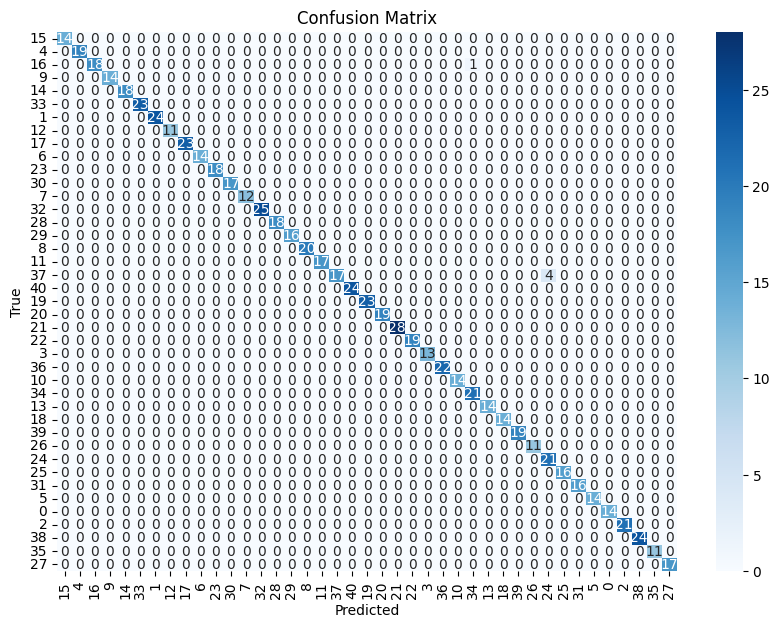

In [37]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df_main['Disease'].unique(), yticklabels=df_main['Disease'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

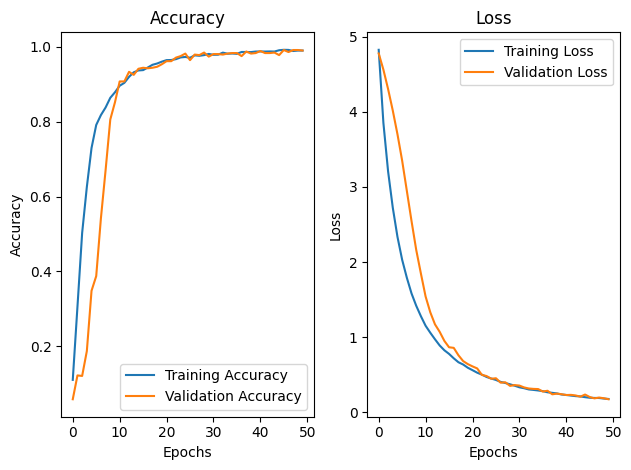

In [38]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
def predict_disease(symptom_names):
    n = len(symptom_names)
    for i in range(11 - n):
        symptom_names.append(np.nan)

    # Encode symptoms using encodedSymp
    new_symptoms_encoded = [encodedSymp[symptom] for symptom in symptom_names if symptom in encodedSymp]

    # Reshape and normalize using minmax_scaler
    new_symptoms_encoded = np.array(new_symptoms_encoded).reshape(1, -1)
    new_symptoms_normalized = minmax_scaler.transform(new_symptoms_encoded)

    # Predict disease using the model
    prediction_probabilities = model.predict(new_symptoms_normalized)
    predicted_class = np.argmax(prediction_probabilities)

    reverse_disease_mapping = {v: k for k, v in disease_mapping.items()}

    # Get the disease name from reverse_disease_mapping
    predicted_disease = reverse_disease_mapping.get(predicted_class, "Unknown Disease")

    return predicted_disease

# Example usage
symptom_names = ['itching',' skin_rash',' nodal_skin_eruptions']
predicted_disease = predict_disease(symptom_names)
print(f"Predicted Disease: {predicted_disease}")

NameError: name 'np' is not defined

In [49]:
import pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)